In [1]:
import pandas as pd


In [19]:
# Read the data from the CSV file:
hechos_victimas = pd.read_csv('Datasets_para_tableau/csv/HechosVictimas.csv')
dim_victima = pd.read_csv('Datasets_para_tableau/csv/DimVictima.csv')
dim_tiempo = pd.read_csv('Datasets_para_tableau/csv/DimTiempo.csv')
hechos_accidentes = pd.read_csv('Datasets_para_tableau/csv/HechosAccidentes.csv')
dim_ubicacion = pd.read_csv('Datasets_para_tableau/csv/DimUbicacion.csv')
dim_caracteristicas= pd.read_csv('Datasets_para_tableau/csv/DimCaracteristicasAccidente.csv')

In [20]:
# Unir las tablas necesarias para el análisis
hechos_victimas_full = hechos_victimas.merge(dim_victima, on='VictimaID').merge(dim_tiempo, on='FechaID')


In [22]:
hechos_accidentes_full = hechos_accidentes.merge(dim_ubicacion, on='UbicacionID').merge(dim_tiempo, on='FechaID').merge(dim_caracteristicas, on='CaracteristicaAccidenteID')

In [57]:
# guardamos los nuevos datasets en csv
hechos_accidentes_full.to_csv('Datasets_full_para_kpi_python/HechosAccidentesFull.csv', index=False)
hechos_victimas_full.to_csv('Datasets_full_para_kpi_python/HechosVictimasFull.csv', index=False)

In [24]:
# Filtrar datos de homicidios en siniestros viales, contando todas las filas de hechos_victimas que tengan una fecha de fallecimiento no nula, ya que no sabemos si la víctima murió en el siniestro o 

homicidios_siniestros = hechos_victimas_full[hechos_victimas_full['FECHA_FALLECIMIENTO'].notnull()]

In [25]:
# Filtrar datos de accidentes de motociclistas
accidentes_moto = hechos_accidentes_full[hechos_accidentes_full['VICTIMA'].str.contains('MOTO', na=False)]

In [27]:
#1. KPI 1: Reducir en un 10% la tasa de homicidios en siniestros viales, este codigo esta errado pues es actual, y los datasets no son actuales, mas abajo continuamos con nuestros codigos: 

# Definir el período de los últimos 6 meses y el semestre anterior
# ultimo_semestre = pd.to_datetime('today') - pd.DateOffset(months=6)
# semestre_anterior = pd.to_datetime('today') - pd.DateOffset(months=12)


In [35]:
hechos_victimas_full['FECHA'] = pd.to_datetime(hechos_victimas_full['FECHA'])
fecha_mas_reciente = hechos_victimas_full['FECHA'].max()
ultimo_semestre = fecha_mas_reciente - pd.DateOffset(months=6)
semestre_anterior = fecha_mas_reciente - pd.DateOffset(months=12)

In [38]:
# Filtrar datos de los últimos 6 meses y el semestre anterior
homicidios_ultimo_semestre = homicidios_siniestros[homicidios_siniestros['FECHA'] >= ultimo_semestre]
homicidios_semestre_anterior = homicidios_siniestros[(homicidios_siniestros['FECHA'] >= semestre_anterior) & (homicidios_siniestros['FECHA'] < ultimo_semestre)]




In [39]:
# Calcular el número de homicidios y la tasa
num_homicidios_ultimo_semestre = len(homicidios_ultimo_semestre)
num_homicidios_semestre_anterior = len(homicidios_semestre_anterior)
poblacion_caba = 3075646  # Población de CABA

In [40]:
# if poblacion_caba != 0:
#     tasa_homicidios_ultimo_semestre = (num_homicidios_ultimo_semestre / poblacion_caba) * 100000
#     tasa_homicidios_semestre_anterior = (num_homicidios_semestre_anterior / poblacion_caba) * 100000

# if tasa_homicidios_semestre_anterior != 0:
#     reduccion_tasa_homicidios = ((tasa_homicidios_semestre_anterior - tasa_homicidios_ultimo_semestre) / tasa_homicidios_semestre_anterior) * 100


if poblacion_caba != 0:
    tasa_homicidios_ultimo_semestre = (num_homicidios_ultimo_semestre / poblacion_caba) * 100000
    tasa_homicidios_semestre_anterior = (num_homicidios_semestre_anterior / poblacion_caba) * 100000
    print("Tasa de homicidios del último semestre:", tasa_homicidios_ultimo_semestre)
    print("Tasa de homicidios del semestre anterior:", tasa_homicidios_semestre_anterior)

if tasa_homicidios_semestre_anterior != 0:
    reduccion_tasa_homicidios = ((tasa_homicidios_semestre_anterior - tasa_homicidios_ultimo_semestre) / tasa_homicidios_semestre_anterior) * 100
    print("Reducción de la tasa de homicidios:", reduccion_tasa_homicidios)




# tasa_homicidios_ultimo_semestre = (num_homicidios_ultimo_semestre / poblacion_caba) * 100000
# tasa_homicidios_semestre_anterior = (num_homicidios_semestre_anterior / poblacion_caba) * 100000

# reduccion_tasa_homicidios = ((tasa_homicidios_semestre_anterior - tasa_homicidios_ultimo_semestre) / tasa_homicidios_semestre_anterior) * 100

Tasa de homicidios del último semestre: 8.518535618208338
Tasa de homicidios del semestre anterior: 16.84199026806076
Reducción de la tasa de homicidios: 49.420849420849414


In [41]:
# 2. KPI 2: Reducir en un 7% la cantidad de accidentes mortales de motociclistas

# Asegúrate de que 'FECHA' esté en formato datetime
hechos_victimas_full['FECHA'] = pd.to_datetime(hechos_victimas_full['FECHA'])

# Encuentra la fecha más reciente en tus datos
fecha_mas_reciente = hechos_victimas_full['FECHA'].max()

# Define el último año y el año anterior basándote en la fecha más reciente
ultimo_ano = fecha_mas_reciente - pd.DateOffset(years=1)
ano_anterior = fecha_mas_reciente - pd.DateOffset(years=2)

In [43]:
# Filtrar datos del último año y el año anterior
# Asegúrate de que 'FECHA' esté en formato datetime
accidentes_moto['FECHA'] = pd.to_datetime(accidentes_moto['FECHA'])

# Filtrar datos del último año y el año anterior
accidentes_moto_ultimo_ano = accidentes_moto[accidentes_moto['FECHA'] >= ultimo_ano]
accidentes_moto_ano_anterior = accidentes_moto[(accidentes_moto['FECHA'] >= ano_anterior) & (accidentes_moto['FECHA'] < ultimo_ano)]

/var/folders/bf/f2bv9fls2wl6xxl27gbh6lnc0000gn/T/ipykernel_11446/1515075584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidentes_moto['FECHA'] = pd.to_datetime(accidentes_moto['FECHA'])


In [44]:
# Calcular el número de accidentes mortales de motociclistas
num_accidentes_moto_ultimo_ano = len(accidentes_moto_ultimo_ano)
num_accidentes_moto_ano_anterior = len(accidentes_moto_ano_anterior)

In [45]:
reduccion_accidentes_moto = ((num_accidentes_moto_ano_anterior - num_accidentes_moto_ultimo_ano) / num_accidentes_moto_ano_anterior) * 100
reduccion_accidentes_moto

-21.161347517730498

In [60]:

# 3. KPI 3: Proponer un tercer KPI
# Ejemplo de un tercer KPI: "Reducir en un 5% la cantidad de accidentes en una determinada área geográfica específica en CABA respecto al año anterior".

# Definir el área específica (ejemplo: Comuna 1)
comuna = 1

In [61]:
# Filtrar datos de la Comuna 1 del último año y el año anterior

hechos_accidentes_full['FECHA'] = pd.to_datetime(accidentes_moto['FECHA'])

accidentes_area_especifica_ultimo_ano = hechos_accidentes_full[(hechos_accidentes_full['COMUNA'] == comuna) & (hechos_accidentes_full['FECHA'] >= ultimo_ano)]
accidentes_area_especifica_ano_anterior = hechos_accidentes_full[(hechos_accidentes_full['COMUNA'] == comuna) & (hechos_accidentes_full['FECHA'] >= ano_anterior) & (hechos_accidentes_full['FECHA'] < ultimo_ano)]


In [62]:
# Calcular el número de accidentes
num_accidentes_area_especifica_ultimo_ano = len(accidentes_area_especifica_ultimo_ano)
num_accidentes_area_especifica_ano_anterior = len(accidentes_area_especifica_ano_anterior)

In [63]:
reduccion_accidentes_area_especifica = ((num_accidentes_area_especifica_ano_anterior - num_accidentes_area_especifica_ultimo_ano) / num_accidentes_area_especifica_ano_anterior) * 100

reduccion_accidentes_area_especifica

44.043092522179975

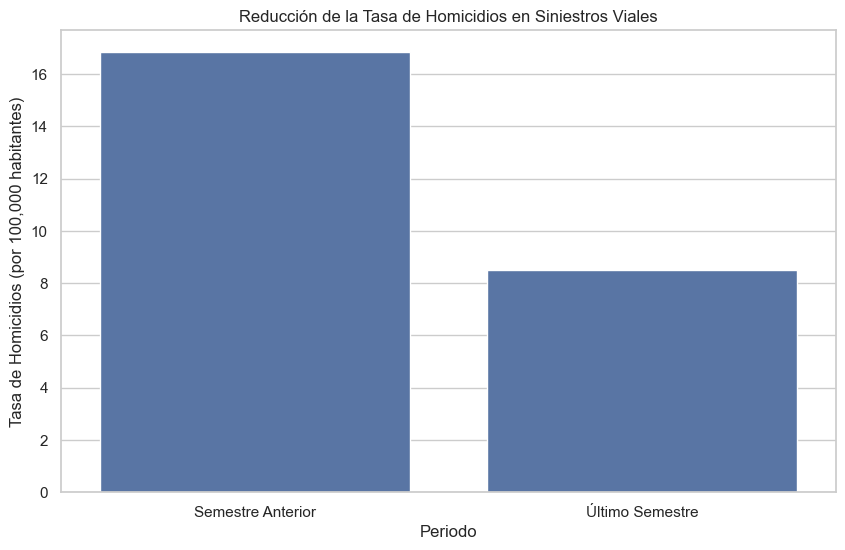

In [64]:
# 4: Graficar los KPIs
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Graficar KPI 1
plt.figure(figsize=(10, 6))
kpi1_data = {'Periodo': ['Semestre Anterior', 'Último Semestre'],
             'Tasa de Homicidios': [tasa_homicidios_semestre_anterior, tasa_homicidios_ultimo_semestre]}
df_kpi1 = pd.DataFrame(kpi1_data)
sns.barplot(x='Periodo', y='Tasa de Homicidios', data=df_kpi1)
plt.title('Reducción de la Tasa de Homicidios en Siniestros Viales')
plt.ylabel('Tasa de Homicidios (por 100,000 habitantes)')
plt.show()



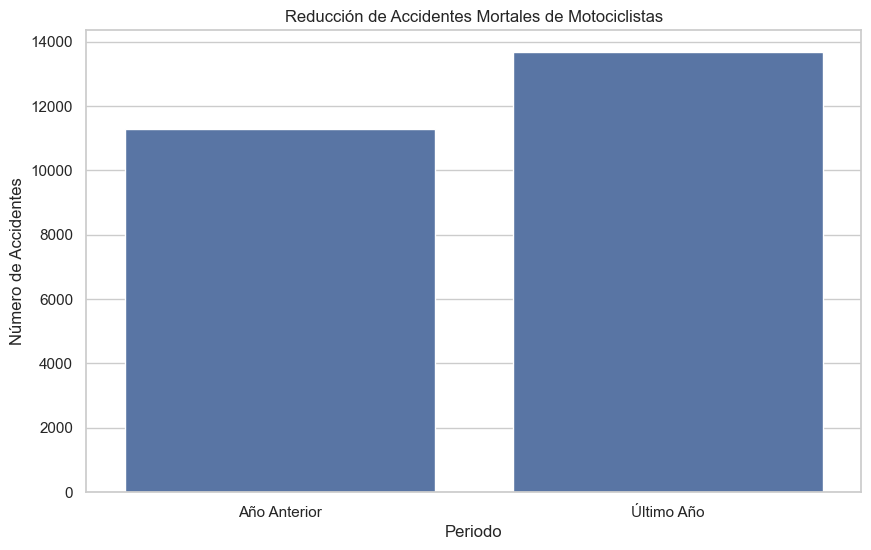

In [65]:
# Graficar KPI 2
plt.figure(figsize=(10, 6))
kpi2_data = {'Periodo': ['Año Anterior', 'Último Año'],
             'Accidentes Mortales de Motociclistas': [num_accidentes_moto_ano_anterior, num_accidentes_moto_ultimo_ano]}
df_kpi2 = pd.DataFrame(kpi2_data)
sns.barplot(x='Periodo', y='Accidentes Mortales de Motociclistas', data=df_kpi2)
plt.title('Reducción de Accidentes Mortales de Motociclistas')
plt.ylabel('Número de Accidentes')
plt.show()



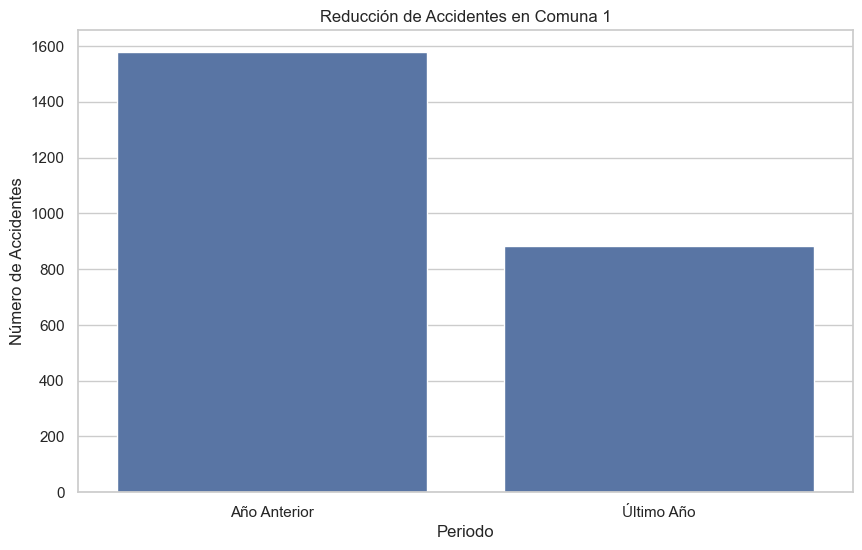

In [66]:
# Graficar KPI 3
plt.figure(figsize=(10, 6))
kpi3_data = {'Periodo': ['Año Anterior', 'Último Año'],
             'Accidentes en Comuna 1': [num_accidentes_area_especifica_ano_anterior, num_accidentes_area_especifica_ultimo_ano]}
df_kpi3 = pd.DataFrame(kpi3_data)
sns.barplot(x='Periodo', y='Accidentes en Comuna 1', data=df_kpi3)
plt.title('Reducción de Accidentes en Comuna 1')
plt.ylabel('Número de Accidentes')
plt.show()
